# 030 NASA MODIS Earthdata : Answers to exercises

#### Exercise 1

The pattern on the tile names is `hXXvYY` where `XX` is the horizontal coordinate and `YY` the vertical.


* use the map above to work out the names of the two tiles that we will need to access data over the UK
* set the variable `tiles` to contain these two names in a list

For example, for the two tiles covering Madagascar, we would set:

    tiles = ['h22v10','h22v11']

In [1]:
# tiles for the UK

tiles = ['h17v03', 'h17v04', 'h18v03', 'h18v04']

#### Exercise 2: mask invalid data

* write a function called `data_mask` that is given:
    * a data dictionary
    * a list of sds strings
    * a list of scale factors
    * a list of upper threshold values
    * a list of lower threshold values
  and returns the dictionary with the scaled and masked datasets 
  
* plot both `Lai_500m` and `LaiStdDev_500m` side-by-side. You should apply appropriate scaling factors and masking as above.

In [7]:
# ANSWER
from geog0111.modisUtils import modisAnnual
from osgeo import gdal
from geog0111.im_display import im_display
import numpy as np

def data_mask(data,sds,scales,uthresh,lthresh):
    '''
    given:
    
    data     : data dictionary
    sds      : list of sds strings
    scales   : list of scale factors
    uthresh  : list of upper threshold values
    lthresh  : list of upper threshold values
    
    return the dictionary with the scaled 
    and masked datasets 
    '''
    for i,s in enumerate(sds):
        scale = scales[i]
        ds = data[s] * scale
        # mask invalid by setting to 
        if uthresh[i] != None:
            ds[ds>=uthresh[i] * scale] = np.nan
        if lthresh[i] != None:
            import pdb;pdb.set_trace()
            ds[ds<=lthresh[i] * scale] = np.nan
        # load back into data_MCD15A3H
        data[s] = ds
    return data

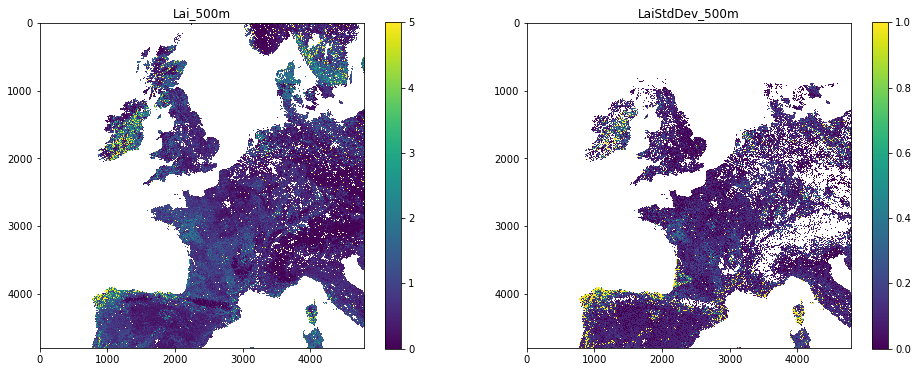

In [8]:
# ANSWER
# put the required SDS in the sds field of kwargs

kwargs = {
    'tile'      :    ['h17v03','h18v03','h17v04','h18v04'],
    'product'   :    'MCD15A3H',
    'sds'       :    ['Lai_500m','LaiStdDev_500m'],
    'doys'       : [41],
    'year'      : 2019,
}

filename,bandname = modisAnnual(verbose=False,**kwargs)
data_MCD15A3H = {}
for f,v in filename.items():
    g = gdal.Open(v)
    if g:
        data_MCD15A3H[f] = g.ReadAsArray()

sds     = kwargs['sds']
scale   = [0.1, 0.1]
uthresh = [100,100]
lthresh = [None,None]

data_MCD15A3H = data_mask(data_MCD15A3H,sds,scale,uthresh,lthresh)
# plot with different vmax for the plots!
im_display(data_MCD15A3H,kwargs['sds'],shape=(1,2),x_size=16,y_size=3,vmax=[5,1])

#### Exercise 3

* write a function called `get_doy` that is given the year, month and day integer and returns the day of year
* test it

In [10]:
# ANSWER
from datetime import datetime

def get_doy(year,month,day):
    '''
    function that is given 
    
    the year 
    and month integer 
        
    and returns the day of year
    '''
    doy = (datetime(year,month,day) - datetime(year-1,12,31)).days
    return doy


In [11]:
# TEST

assert get_doy(2019,1,1) == 1
assert get_doy(2019,2,1) == 32

#### Exercise 5

* Explore the MODIS datasets in your own time, and get to know the datasets they contain, along with the scaling factors and other interpretation information. Note that if we have not already downloaded particular datasets into the cache, it  may take a short time for them to download and load.

In [19]:
# ANSWER
# Explore!